In [4]:
pip install pyballmapper 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install kmapper

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import sklearn
import kmapper as km
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import plotly.graph_objs as go
import ipywidgets as ipw

from pyballmapper import BallMapper
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
from scipy.stats import circmean
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# T-shape dataset

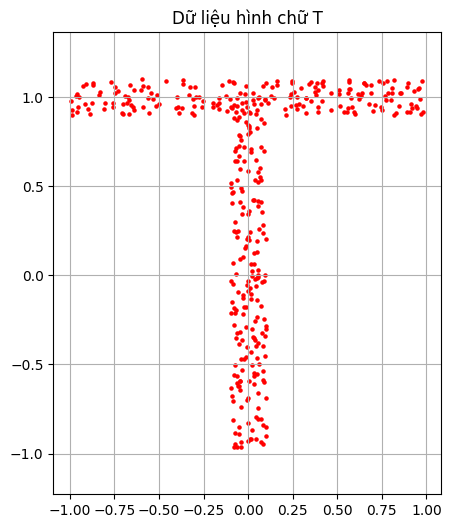

,x,y
0,0.662947,1.067311
1,0.851830,1.024492
2,0.768658,1.008734
3,-0.875735,0.967524
4,-0.640674,0.929174


In [109]:
def generate_T_shape(n_horizontal, n_vertical, noise):
    x_h = np.random.uniform(-1, 1, n_horizontal)
    y_h = np.random.uniform(0.9, 1.1, n_horizontal)

    x_v = np.random.uniform(-0.1, 0.1, n_vertical)
    y_v = np.random.uniform(-1, 1, n_vertical)

    x = np.concatenate([x_h, x_v])
    y = np.concatenate([y_h, y_v])

    x += np.random.normal(0, noise, len(x))
    y += np.random.normal(0, noise, len(y))

    return x, y


x, y = generate_T_shape(n_horizontal=200, n_vertical=200, noise=0.0)
plt.figure(figsize=(5, 6))
plt.scatter(x, y, s=5, c='red')
plt.title("Dữ liệu hình chữ T")
plt.axis('equal')
plt.grid(True)
plt.show()

pointcloud = np.array([x, y]).T
points_df= pd.DataFrame(pointcloud, columns=['x', 'y'])
angle_df = pd.DataFrame(np.zeros((len(pointcloud), 1)), columns=['angle'])
points_df.head()


# Ball Mapper algorithm for T-shape dataset

[0, 1, 2, 3, 4, 5, 6]
[1, 4, 9, 10, 12, 13, 14, 17, 22, 24, 29, 31, 32, 35, 37, 39, 40, 41, 42, 43, 44, 45, 47, 50, 52, 56, 58, 63, 66, 68, 71, 72, 73, 74, 80, 81, 84, 86, 88, 90, 91, 100, 103, 104, 105, 106, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 121, 129, 132, 133, 136, 137, 140, 141, 148, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 164, 166, 167, 168, 169, 170, 172, 177, 187, 189, 190, 194, 197, 199, 203, 204, 224, 228, 229, 232, 235, 242, 260, 290, 301, 306, 308, 310, 323, 324, 325, 333, 334, 350, 377, 389, 395, 396]


C:\Users\DELL\AppData\Local\Temp\ipykernel_10608\3166045812.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_palette=cm.get_cmap("hsv"),


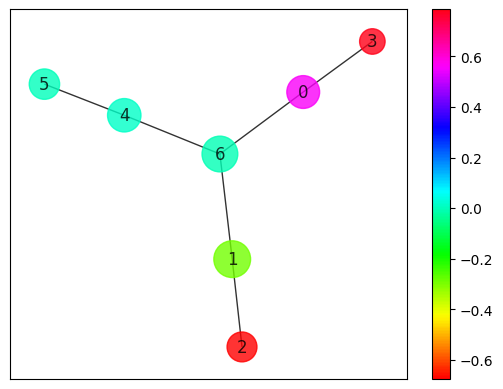

In [108]:
pointcloud = np.array([x, y]).T
points_df= pd.DataFrame(pointcloud, columns=['x', 'y'])
angle_df = pd.DataFrame(np.zeros((len(pointcloud), 1)), columns=['angle'])
points_df.head()

bm = BallMapper(
    X=points_df.values, eps=0.45
)
print(bm.Graph.nodes)
print(bm.points_covered_by_landmarks[1])
bm.points_and_balls()


x_df = pd.DataFrame({"x": points_df['x']})

# Gán biến màu vào BallMapper
bm.add_coloring(coloring_df=x_df, custom_function=np.mean)

# Vẽ đồ thị với màu theo trục x
from matplotlib import cm
bm.draw_networkx(
    coloring_variable="x",
    color_palette=cm.get_cmap("hsv"),
    colorbar=True
)
plt.show()

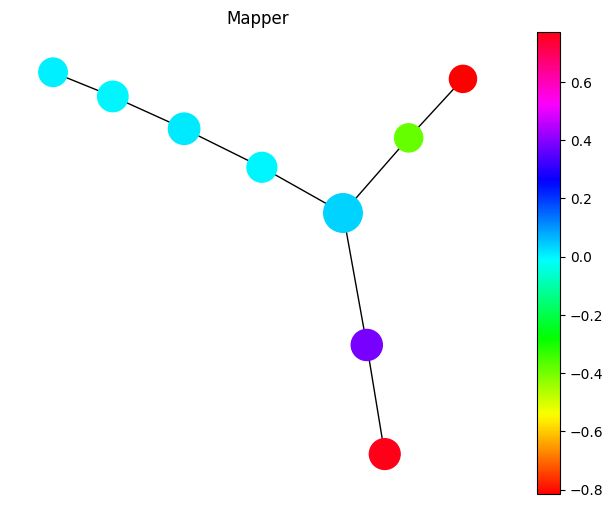

In [63]:
X = np.array([x, y]).T
points_df= pd.DataFrame(X, columns=['x', 'y'])
angle_df = pd.DataFrame(np.zeros((len(X), 1)), columns=['angle'])
points_df.head()
mapper = km.KeplerMapper(verbose=0)
lens = mapper.fit_transform(X, projection="x")  # hoặc "y", "l2norm", PCA(n_components=1)
graph = mapper.map(lens, X,
                   cover=km.Cover(n_cubes=5, perc_overlap=0.1),
                   clusterer=DBSCAN(eps=0.5, min_samples=5))


G = nx.Graph()
colors = []
for node_id, indices in graph['nodes'].items():
    G.add_node(node_id, size=len(indices))
    
    # Trung bình x của các điểm trong node
    mean_x = np.mean(X[indices, 0])
    colors.append(mean_x)

for node1 in graph['links']:
    for node2 in graph['links'][node1]:
        if node1 != node2:
            G.add_edge(node1, node2)
pos = nx.spring_layout(G, seed=42)
sizes = [G.nodes[n]['size'] * 10 for n in G.nodes]
cmap = cm.hsv
norm = plt.Normalize(min(colors), max(colors))
node_colors = [cmap(norm(c)) for c in colors]


fig, ax = plt.subplots(figsize=(8, 6)) 
nx.draw(G, pos, with_labels=False, node_size=sizes, node_color=node_colors, edge_color='black', ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

fig.colorbar(sm, ax=ax, label="")  # sửa ở đây
ax.set_title("Mapper")
ax.axis('off')
plt.show()